In [1]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
from scipy.stats import norm
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import plotly.offline as pyo
pyo.init_notebook_mode()



In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
  
try:
    gym = pd.read_csv('/datasets/gym_churn_us.csv', sep = ',') 
except:
    gym = pd.read_csv('datasets/gym_churn_us.csv', sep = ',' ) 

In [4]:
gym.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [5]:
gym.shape

(4000, 14)

In [6]:
gym.columns= gym.columns.str.lower()

The dataset is about the customer of a gym .  The main purpose of the project is to calculate the churn rate . The data set contain information about the customer age , lifetime of the visit to gym , the amout of money total spent and so on .

In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


The type of each column is okay , I think . Some of columns has binary feature such as gender , Near Location but I think they can stay as it because it does not create any problem .

The dateset is about the infomration customers in a gym  customer churn  . The purpose of the project is calculate  customer churn.There are 3743 entities therefore we can say that our dateset is reliable  . I converted the name of column into lower case . The type of each column is okay . I think that int and float will not create a problem for colcuation , that is way I did not change them .   

### Step 2. Carry out exploratory data analysis (EDA)

In [8]:
gym.duplicated().any()

False

In [9]:
gym.isna().mean().round(4) * 100

gender                               0.0
near_location                        0.0
partner                              0.0
promo_friends                        0.0
phone                                0.0
contract_period                      0.0
group_visits                         0.0
age                                  0.0
avg_additional_charges_total         0.0
month_to_end_contract                0.0
lifetime                             0.0
avg_class_frequency_total            0.0
avg_class_frequency_current_month    0.0
churn                                0.0
dtype: float64

The dataset has no duplicated value and missing value 

In [10]:
gym_stat=gym[['contract_period','age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']]
gym_stat.describe()

contract_period          age  avg_additional_charges_total  \
count      4000.000000  4000.000000                   4000.000000   
mean          4.681250    29.184250                    146.943728   
std           4.549706     3.258367                     96.355602   
min           1.000000    18.000000                      0.148205   
25%           1.000000    27.000000                     68.868830   
50%           1.000000    29.000000                    136.220159   
75%           6.000000    31.000000                    210.949625   
max          12.000000    41.000000                    552.590740   

       month_to_end_contract     lifetime  avg_class_frequency_total  \
count            4000.000000  4000.000000                4000.000000   
mean                4.322750     3.724750                   1.879020   
std                 4.191297     3.749267                   0.972245   
min                 1.000000     0.000000                   0.000000   
25%                 1.000000     1.000000                   1.180875   
50%                 1.000000     3.000000                   1.832768   
75%                 6.000000     5.000000                   2.536078   
max                12.000000    31.000000                   6.023668   

       avg_class_frequency_current_month  
count                        4000.000000  
mean                            1.767052  
std                             1.052906  
min                             0.000000  
25%                             0.963003  
50%                             1.719574  
75%                             2.510336  
max                             6.146783

In [11]:
gym_numerical=gym[['contract_period','age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']]
gym_group=gym[['near_location', 'partner', 'gender', 'promo_friends', 'group_visits', 'churn']]


In [12]:
print('The 97.5 percent of percentile of  Contract_period is {}'.format(np.percentile(gym['contract_period'], 97.5)))
print('The 97.5 percent of percentile of  Age is {}'.format(np.percentile(gym['age'], 97.5)))
print('The 97.5 percent of percentile of  Avg_additional_charges_total  is {}'.format(np.percentile(gym['avg_additional_charges_total'], 97.5)))
print('The 97.5 percent of percentile of  Month_to_end_contract is {}'.format(np.percentile(gym_numerical['month_to_end_contract'], 97.5)))
print('The 97.5 percent of percentile of  Lifetime is {}'.format(np.percentile(gym_numerical['lifetime'], 97.5)))
print('The 97.5 percent of percentile of  Avg_class_frequency_total is {}'.format(np.percentile(gym_numerical['avg_class_frequency_total'], 97.5)))
print('The 97.5 percent of percentile of  Avg_class_frequency_current_month is {}'.format(np.percentile(gym_numerical['avg_class_frequency_current_month'], 97.5)))

The 97.5 percent of percentile of  Contract_period is 12.0
The 97.5 percent of percentile of  Age is 35.0
The 97.5 percent of percentile of  Avg_additional_charges_total  is 357.76752389578627
The 97.5 percent of percentile of  Month_to_end_contract is 12.0
The 97.5 percent of percentile of  Lifetime is 14.0
The 97.5 percent of percentile of  Avg_class_frequency_total is 3.8465077369033223
The 97.5 percent of percentile of  Avg_class_frequency_current_month is 3.853999071185964


In [13]:
data_numeric = gym[['avg_additional_charges_total', 'month_to_end_contract',
        'avg_class_frequency_total', 'avg_class_frequency_current_month', 'contract_period', 'age','lifetime','churn']]
left= data_numeric[data_numeric['churn']== 1]
stayed= data_numeric[data_numeric['churn']== 0]

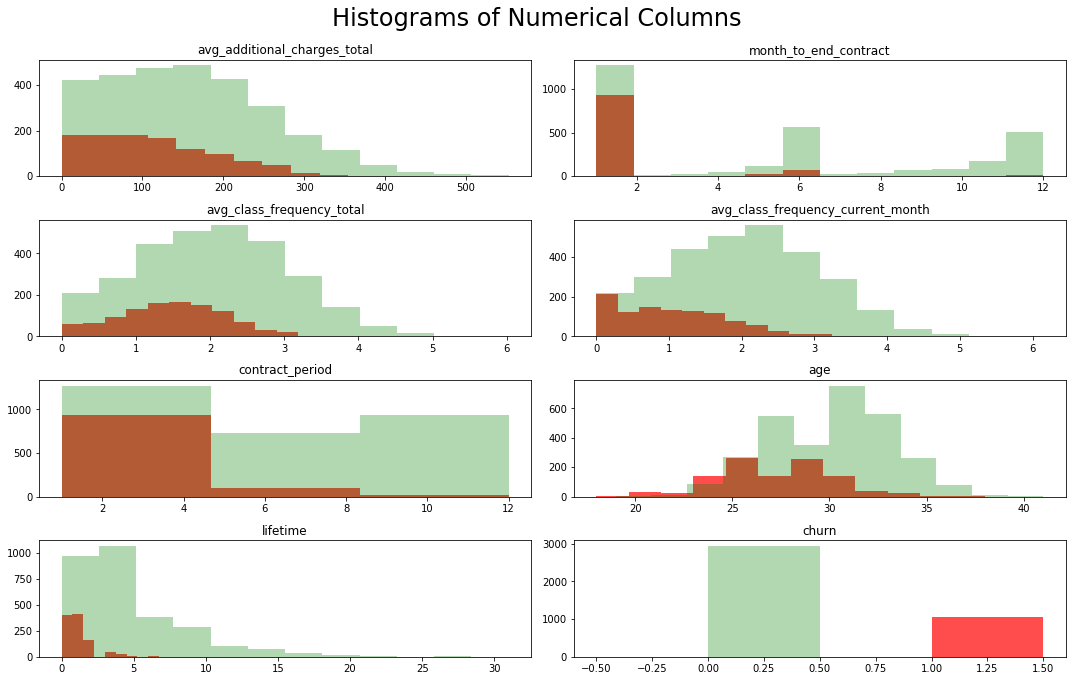

In [14]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(data_numeric.shape[1]):
    plt.subplot(5, 2, i + 1)
    f = plt.gca()
    f.set_title(data_numeric.columns.values[i])
    vals = np.size(data_numeric.iloc[:, i].unique())
    if vals >= 12:
        vals = 12
    plt.hist(left.iloc[:, i], bins=vals, color = 'red', alpha= 0.7, label = 'gym_left')
    plt.hist(stayed.iloc[:, i], bins=vals, color = 'green', alpha=0.3, label = 'gym_stayed')
    

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In some ways, the patterns of additional spending are similar, but those who stayed in the gym had a higher proportion of customers spending more than average additional expenditure compared to those who departed.

When compared to customers who left the gym, those who continue to utilize the gym have higher propertion users with longer contract periods. Users who continue to use the gym have a greater proportion of users who utilize it on a regular basis.

In [15]:

category = gym[['gender', 'near_location', 'partner', 'promo_friends', 'phone',
         'group_visits',   'churn']]

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



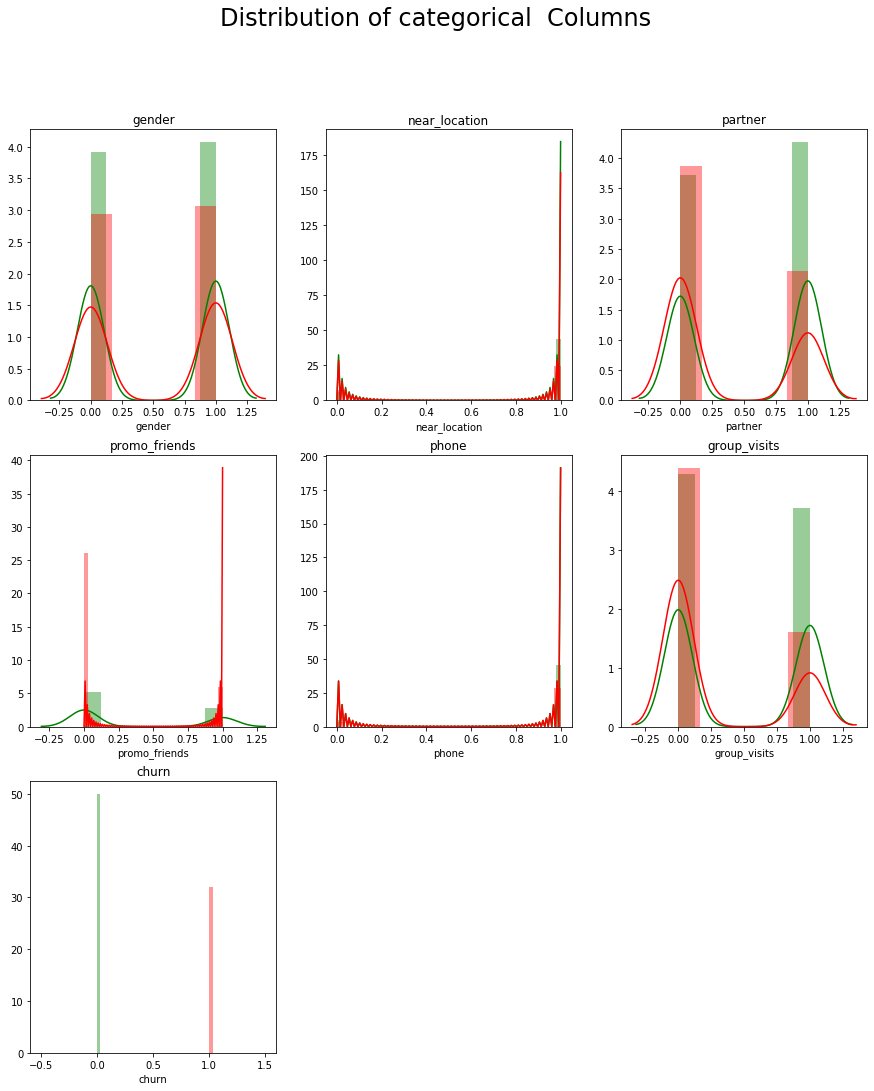

In [16]:
    
fig = plt.figure(figsize=(15, 17))
plt.suptitle('Distribution of categorical  Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(category.shape[1]):
    plt.subplot(3, 3, i + 1)
    f = plt.gca()
    f.set_title(category.columns.values[i])
    
    sns.distplot(category[category['churn']==0].iloc[:, i], color = 'green')
    sns.distplot(category[category['churn']==1].iloc[:, i], color = 'red')

When compared to those who do not live or work in the neighborhood, a higher proportion of users from the community continued to frequent the gym.Similarly, users who work for a partner company were more likely to continue attending the gym than those who signed up through a "bring a friend" promotion. Also,When compared to individuals who did not participate in group sessions, fewer persons departed the gym.

In [17]:
gym=gym.loc[gym['lifetime'].abs()<=14 ] 
gym=gym.loc[gym['avg_class_frequency_total'].abs() < 4]
gym=gym.loc[gym['avg_additional_charges_total'].abs() <357]

I used some histograms, boxplots, and np. percentages to define the outliers. I think that the important ones are lifetime,avg_class_frequency_total andavg_additional_charges_total  others have not so much dramatic outliers. Therefore I limited these 3 columns   

In [18]:
gym.describe()

gender  near_location      partner  promo_friends        phone  \
count  3743.000000    3743.000000  3743.000000    3743.000000  3743.000000   
mean      0.512958       0.841838     0.486508       0.307775     0.904355   
std       0.499899       0.364941     0.499885       0.461634     0.294143   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      3743.000000   3743.000000  3743.000000   
mean          4.614748      0.404756    29.138392   
std           4.540702      0.490910     3.264662   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   3743.000000            3743.000000  3743.000000   
mean                     139.621890               4.269036     3.378841   
std                       87.457585               4.190802     3.075428   
min                        0.148205               1.000000     0.000000   
25%                       66.865160               1.000000     1.000000   
50%                      132.068383               1.000000     2.000000   
75%                      204.426747               6.000000     5.000000   
max                      356.522967              12.000000    14.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                3743.000000                        3743.000000   
mean                    1.829396                           1.709472   
std                     0.914229                           0.998011   
min                     0.000000                           0.000000   
25%                     1.167094                           0.937436   
50%                     1.807480                           1.676092   
75%                     2.476462                           2.445925   
max                     3.994194                           4.100004   

             churn  
count  3743.000000  
mean      0.282661  
std       0.450353  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [19]:
group_count=gym.groupby('churn')['near_location', 'partner', 'gender', 'promo_friends', 'group_visits'].count()
group_count

near_location  partner  gender  promo_friends  group_visits
churn                                                             
0               2685     2685    2685           2685          2685
1               1058     1058    1058           1058          1058

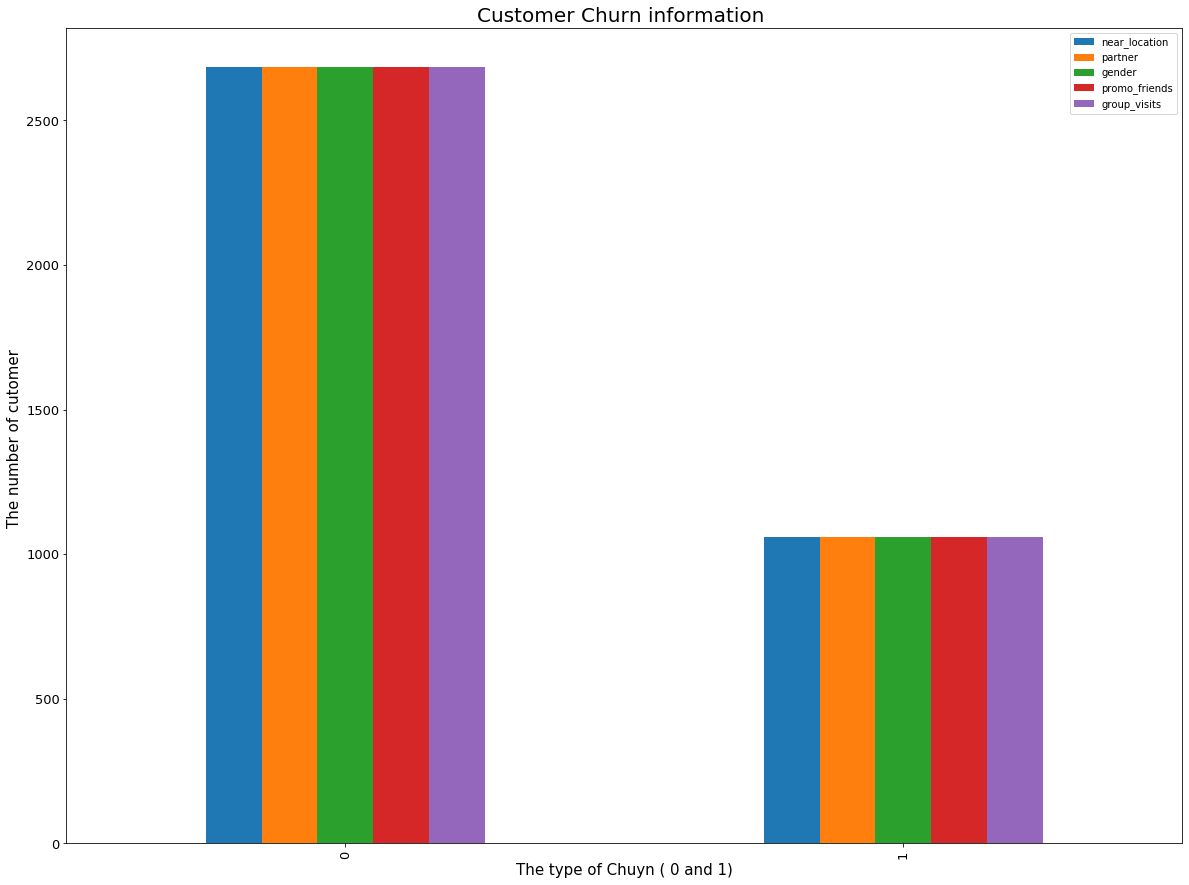

In [20]:
ax = group_count.plot(kind='bar', figsize=(20,15), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Customer Churn information ", fontsize=20)
ax.set_xlabel("The type of Chuyn ( 0 and 1)", fontsize=15)
ax.set_ylabel("The number of cutomer ", fontsize=15);
plt.show()

The bar chart shows the columns which have binary ( 0 and 1 ) values.

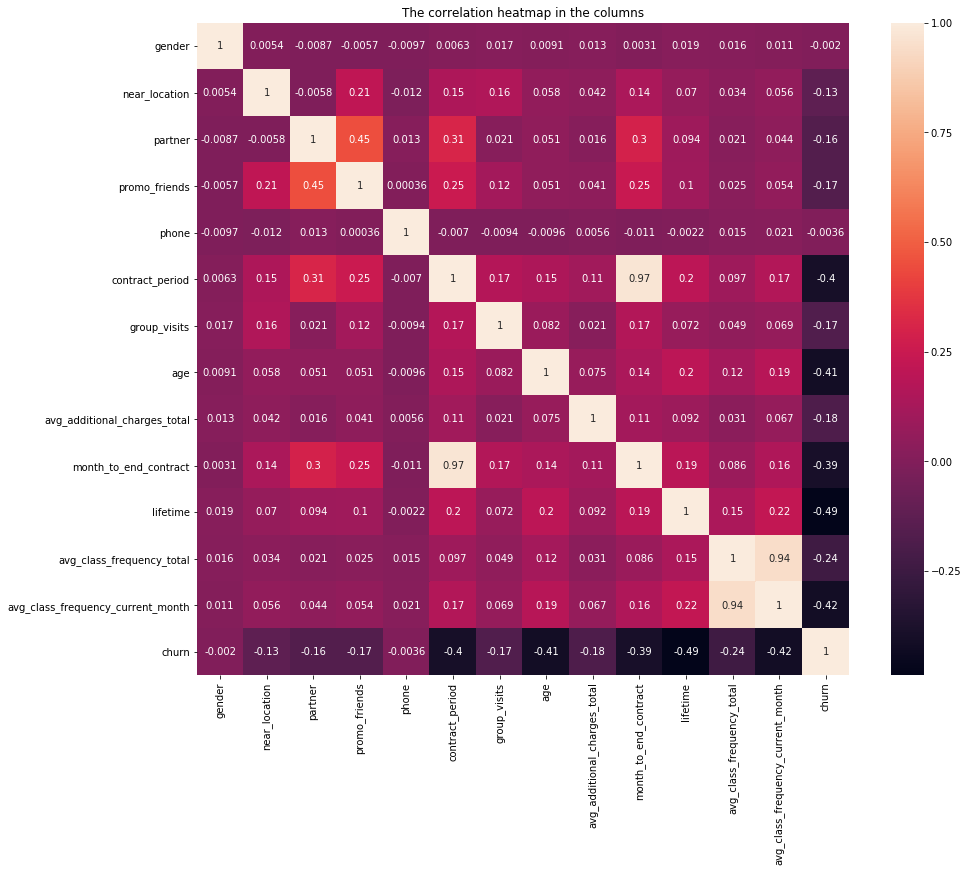

In [21]:
cm = gym.corr() 
plt.figure(figsize=(15, 12))
plt.title('The correlation heatmap in the columns')
sns.heatmap(cm, annot = True, square=True);

There is a strong correlation between come columns, therefore we can drop them.

In [22]:
gym = gym.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1) 

There are no missing and duplicated values ,  I deleted some of the outlier which I though could effect the results of the analytyis , I convert the data set into 2 datsets such such numberical in which I can calculate  mean  , std and son on . In this categry I find the 97.5 percental of all columns and droped the outliers . The outlier could be find also the help of histrogram , For  binary type of columns I used the bar chart . the interestingly I columns has the same number of 0 and 1 in churn . Churn 0 is 2685  and churn 1  is  1058. I deleted also some columns that are strongly correlated with each others .

### Step 3. Build a model to predict user churn

In [23]:
gym.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  lifetime  \
0             1   29                     14.227470         3   
1             1   31                    113.202938         7   
2             0   28                    129.448479         2   
3             1   33                     62.669863         2   
4             0   26                    198.362265         3   

   avg_class_frequency_total  churn  
0                   0.020398      0  
1                   1.922936      0  
2                   1.859098      0  
3                   3.205633      0  
4                   1.113884      0

In [24]:
y =gym['churn']
X = gym.drop(['churn', 'phone'], axis = 1) 

The target value I y that will be predicted, the facts is X. I dropped also phone because it is not so important and to make the model a little more easy not so much complicated

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

Here I splited the date set into 4 groups 

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

I standard the values in order to make the model to predict more easily and precisely 

In [27]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [28]:
model = LogisticRegression()

In [29]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [30]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

In [32]:
print('Logistic regression metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities)))


Logistic regression metrics
Accuracy: 0.90
Precision: 0.83
Recall: 0.81
F1: 0.82
ROC_AUC: 0.95



The accuracy rate shows that claess are quit good balanced but of course it could be improve with training  , and ROC_Auc is 95 which meaning that the probablity of prediction is quite high . 

In [33]:
tree_model =  DecisionTreeClassifier(random_state=11)

In [34]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [35]:
tree_predictions =tree_model.predict(X_test)
tree_probabilities = tree_model.predict_proba(X_test)[:,1]

In [36]:
print('Decision tree metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, tree_probabilities)))

Decision tree metrics
Accuracy: 0.86
Precision: 0.74
Recall: 0.76
F1: 0.75
ROC_AUC: 0.83


Here we see  that Logistic regression metrics is better than  tree model .

As target value, I chose the churn column and fact the rest of them. I also dropped some columns in favour of making the model easier to avoid overfitting problems. I standard the data set also, it is okay to do that because in the previous task I dropped the outliers therefore mean would be okay, and lower standard deviation. First I used LogisticRegression the Metrics  are good, then tree method but it tree method the Metrics are weaker that LogisticRegression

### Step 4. Create user clusters

In [37]:
sc = StandardScaler()
X_sc = sc.fit_transform(gym)

In [38]:
linked = linkage(X_sc, method = 'ward') 

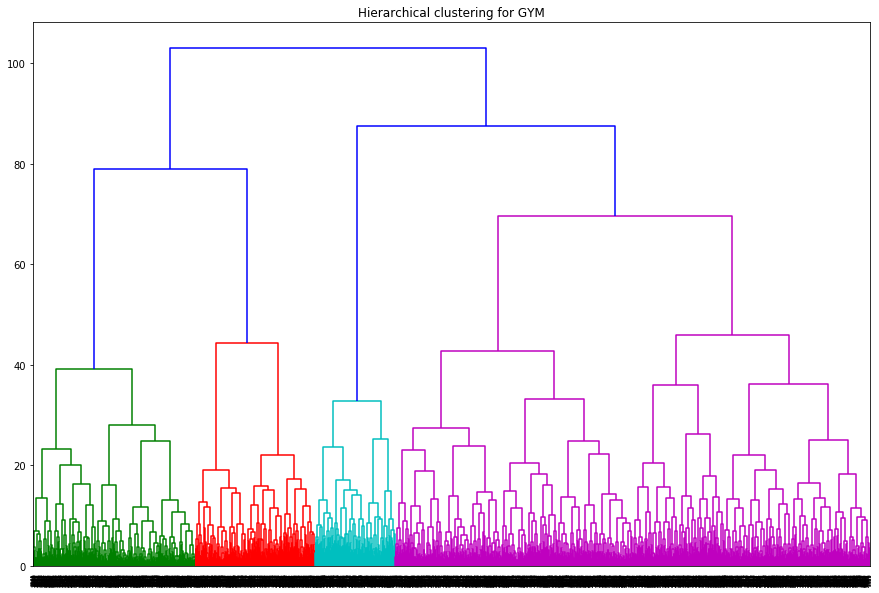

In [39]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

It seem that 5 could be prober . 

In [40]:

km = KMeans(n_clusters = 5, n_init=10, random_state=11)

In [41]:
labels = km.fit_predict(X_sc)

In [42]:
gym['clusters']=labels

In [43]:
gym_group_mean = gym.groupby(['clusters']).mean().reset_index()

In [44]:
gym_group_mean.head()

clusters    gender  near_location   partner  promo_friends     phone  \
0         0  0.514963       1.000000  0.332918       0.216958  0.897756   
1         1  0.000000       0.998639  0.323810       0.066667  0.904762   
2         2  1.000000       0.997484  0.301887       0.072956  0.901887   
3         3  0.503448       0.000000  0.486207       0.068966  0.910345   
4         4  0.505415       0.989170  0.955475       1.000000  0.908544   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         1.723192      0.291771  26.922693                    113.421843   
1         5.001361      0.444898  30.068027                    148.211957   
2         4.939623      0.479245  30.075472                    153.724523   
3         2.906897      0.220690  28.646552                    131.404772   
4         7.944645      0.535499  29.901324                    149.553388   

   lifetime  avg_class_frequency_total     churn  
0  0.956359                   1.481892  0.996259  
1  4.239456                   1.914411  0.002721  
2  4.316981                   2.045976  0.001258  
3  2.770690                   1.738198  0.422414  
4  4.482551                   1.946034  0.013237

In [45]:
gym.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  lifetime  \
0             1   29                     14.227470         3   
1             1   31                    113.202938         7   
2             0   28                    129.448479         2   
3             1   33                     62.669863         2   
4             0   26                    198.362265         3   

   avg_class_frequency_total  churn  clusters  
0                   0.020398      0         4  
1                   1.922936      0         1  
2                   1.859098      0         1  
3                   3.205633      0         4  
4                   1.113884      0         4

In [46]:
pd.DataFrame(gym['clusters'].value_counts())

clusters
4       831
0       802
2       795
1       735
3       580

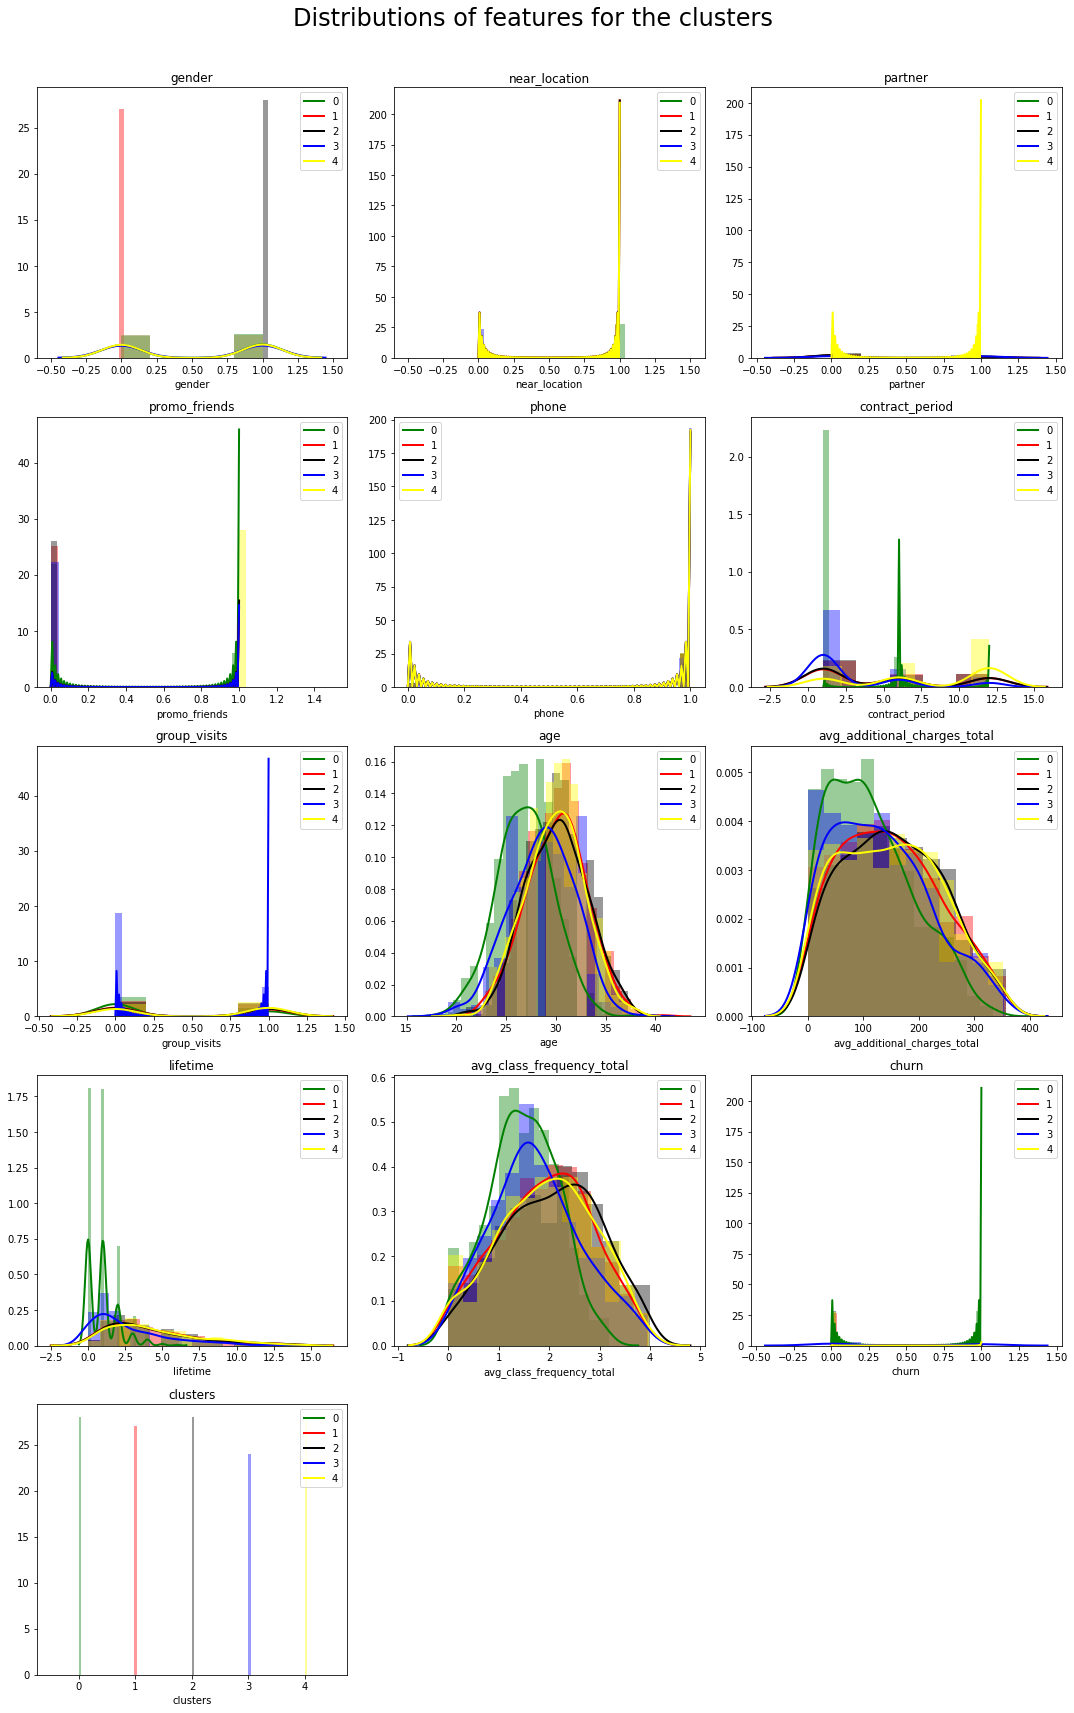

In [47]:
fig = plt.figure(figsize=(15, 25))
plt.suptitle('Distributions of features for the clusters \n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(gym.shape[1]):
    plt.subplot(5, 3, i + 1)
    f = plt.gca()
    f.set_title(gym.columns.values[i])    
    sns.distplot(gym[gym['clusters']==0].iloc[:, i], color = 'green',  kde_kws={"color": "green", "lw": 2, "label": "0"})
    sns.distplot(gym[gym['clusters']==1].iloc[:, i], color = 'red',  kde_kws={"color": "red", "lw": 2, "label": "1"})
    sns.distplot(gym[gym['clusters']==2].iloc[:, i], color = 'k',  kde_kws={"color": "k", "lw": 2, "label": "2"})
    sns.distplot(gym[gym['clusters']==3].iloc[:, i], color = 'blue',  kde_kws={"color": "blue", "lw": 2, "label": "3"})
    sns.distplot(gym[gym['clusters']==4].iloc[:, i], color = 'yellow',  kde_kws={"color": "yellow", "lw": 2, "label": "4"})
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])   

The clusters are symmetrically distributed among both genders, however the sizes of the clusters vary. Clusters '2','4', and '0' have 1 month, 6 month, and 12 month contract periods, respectively, based on feature contract period. Clusters have comparable month-to-month contract variations.Cluster two, cluster four, and the remaining clusters are distinguished by their average class frequency and average total frequency. One aspect that helps to distinguish cluster '0' from the other clusters is the phone.

We see there the age distribution in 5 cluster . There are not so much difference in each cluster is normal distributed  and the  30 years old people are many custormer of gym .

Step 5. Come up with conclusions and basic recommendations on working with customers

The data set is about  the infomation related the customers . The maThe data set is free from missing values and duplicated values. The data was cleaned from some outlier and deleted some columns which had a stong inter-correlation. For prediction churn column is the target and the other columns are the features. I dropped also some columns which I thought are not important. The LogisticRegression model is used for prediction, and the ROC rate is 0.95. % cluster is proper for this task, and we can say that the people who visit the gym regularly are at their 30. In all clusters, this case is almost true.  people at 30 should be the target group. in question is to calculate their churn rate. 

Feature ranking:
1. feature 8 (0.293932)
2. feature 6 (0.169810)
3. feature 9 (0.152819)
4. feature 4 (0.139162)
5. feature 7 (0.123603)
6. feature 0 (0.030009)
7. feature 5 (0.026362)
8. feature 2 (0.024395)
9. feature 3 (0.020821)
10. feature 1 (0.019088)


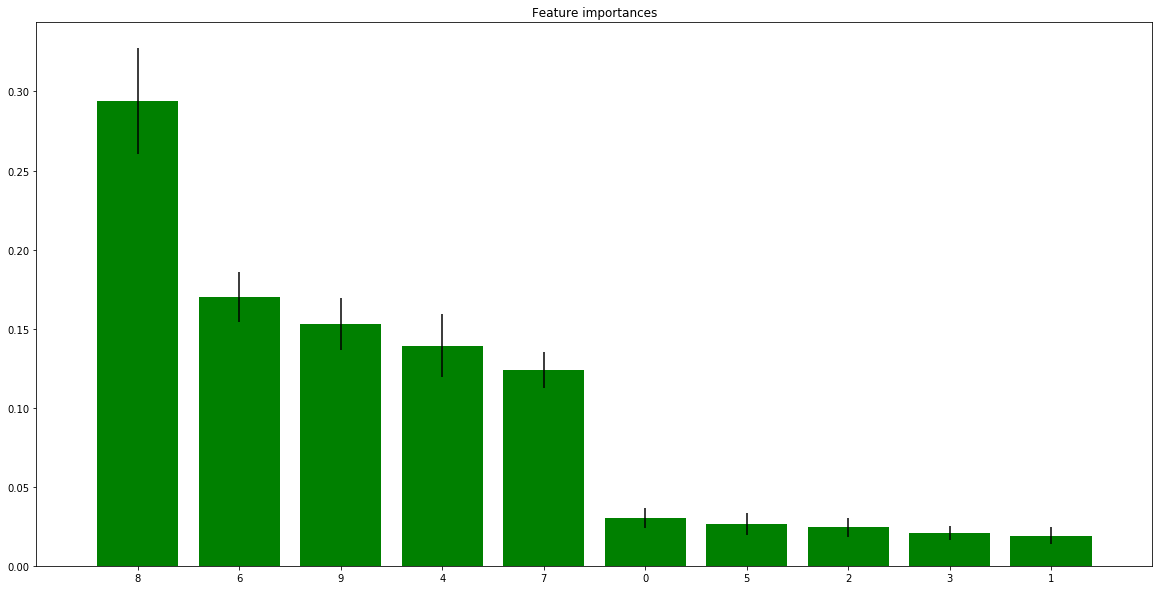

Index(['gender', 'near_location', 'partner', 'promo_friends',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime',
       'avg_class_frequency_total'],
      dtype='object')


In [50]:
forest = ExtraTreesClassifier(n_estimators=250, criterion ='entropy', random_state=11)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show();
print(X_train.columns)

The most crucial features in calculating churn rate is 'avg class frequency total.' About 30 percent of users live or work in the neighborhood where the gym is located. In comparison to individuals who do not live or work in the neighborhood, a higher proportion of users from the community continued to utilize the gym.Similarly, users employed by a partner company were more likely to continue attending the gym than those who signed up through a "promo_friends" promotion. Those who did not leave the gym had a longer contract time on average than those who did. In addition, when compared to individuals who did not participate in group sessions, a smaller percentage of persons departed the gym.Similarly, those that stayed in the gym have a higher average age, more extra expenditure, a longer month-to-month contract, longer lifetime, avg additional charges total, and churn than those who left.The gender of the person providing the phone number has no bearing on the turnover rate.
The churn rate is correlated with age, contract period, and average class frequency in the previous month. Similarly, the number of months left before the conclusion of the contract duration has a larger correlation with the churn rate.

### Recommendation

The gender of the person providing the phone number has no bearing on the turnover rate.
The churn rate is correlated with age, contract period, and average class frequency in the previous month. Similarly, the number of months left before the conclusion of the contract duration has a larger correlation with the churn rate.